# Support Vector Machines (SVM) Tutorial

Welcome to this comprehensive tutorial on Support Vector Machines! SVMs are powerful algorithms that work well for both classification and regression tasks.

## What are Support Vector Machines?

SVMs are supervised learning models that:
- Find the optimal hyperplane that separates different classes
- Maximize the margin between classes
- Use support vectors (data points closest to the decision boundary)
- Can handle non-linear data using kernel functions
- Work well with high-dimensional data

## Key Concepts:
- **Hyperplane**: Decision boundary that separates classes
- **Margin**: Distance between hyperplane and nearest data points
- **Support Vectors**: Data points that define the margin
- **Kernel Trick**: Transform data to higher dimensions for non-linear separation

Let's explore SVMs with hands-on examples!

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification, make_regression, make_circles, make_moons
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
%matplotlib inline

## 2. Linear SVM - Understanding the Basics

Let's start with a simple linearly separable dataset to understand how SVM works.

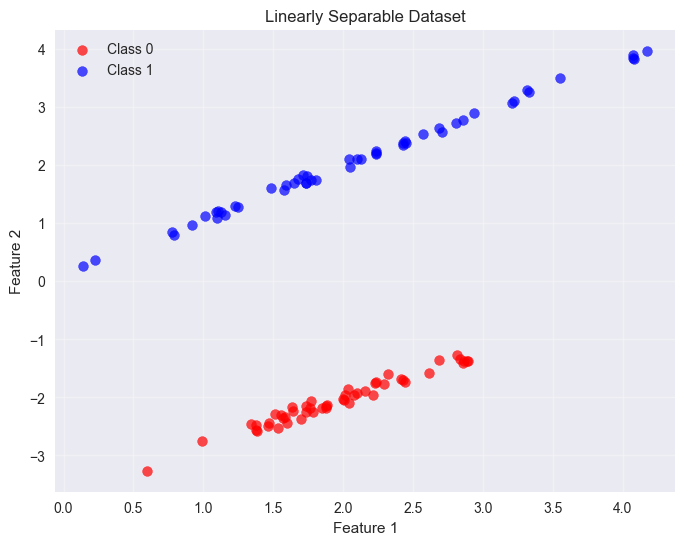

In [2]:
# Create a simple linearly separable dataset
np.random.seed(42)
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                                        n_informative=2, n_clusters_per_class=1, 
                                        class_sep=2, random_state=42)

# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):
    mask = y_linear == i
    plt.scatter(X_linear[mask, 0], X_linear[mask, 1], c=colors[i], 
               label=f'Class {i}', s=50, alpha=0.7)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
# Function to plot SVM decision boundary and support vectors
def plot_svm_decision_boundary(X, y, model, title):
    plt.figure(figsize=(10, 8))
    
    # Create mesh for plotting decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Get predictions for mesh points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
    
    # Plot data points
    colors = ['red', 'blue']
    for i in range(2):
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], 
                   label=f'Class {i}', s=50, alpha=0.7, edgecolors='black')
    
    # Highlight support vectors
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
               s=200, facecolors='none', edgecolors='yellow', linewidth=3,
               label='Support Vectors')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print model info
    print(f"Number of support vectors: {len(model.support_vectors_)}")
    print(f"Support vectors per class: {model.n_support_}")

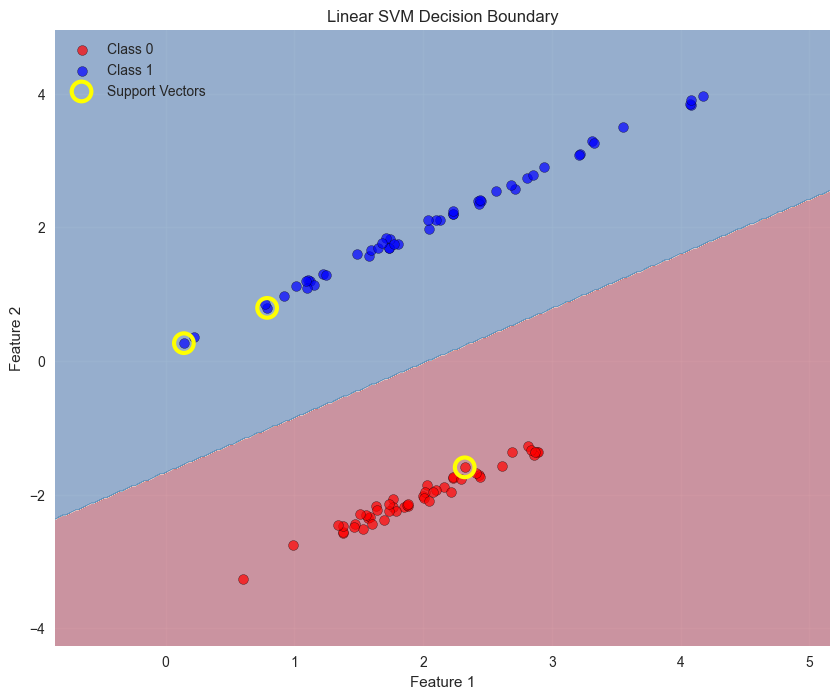

Number of support vectors: 3
Support vectors per class: [1 2]

Training Accuracy: 1.000


In [4]:
# Train linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_linear, y_linear)

# Plot decision boundary
plot_svm_decision_boundary(X_linear, y_linear, svm_linear, 'Linear SVM Decision Boundary')

# Calculate accuracy
accuracy = svm_linear.score(X_linear, y_linear)
print(f"\nTraining Accuracy: {accuracy:.3f}")

## 3. Effect of C Parameter (Regularization)

The C parameter controls the trade-off between maximizing margin and minimizing classification errors.

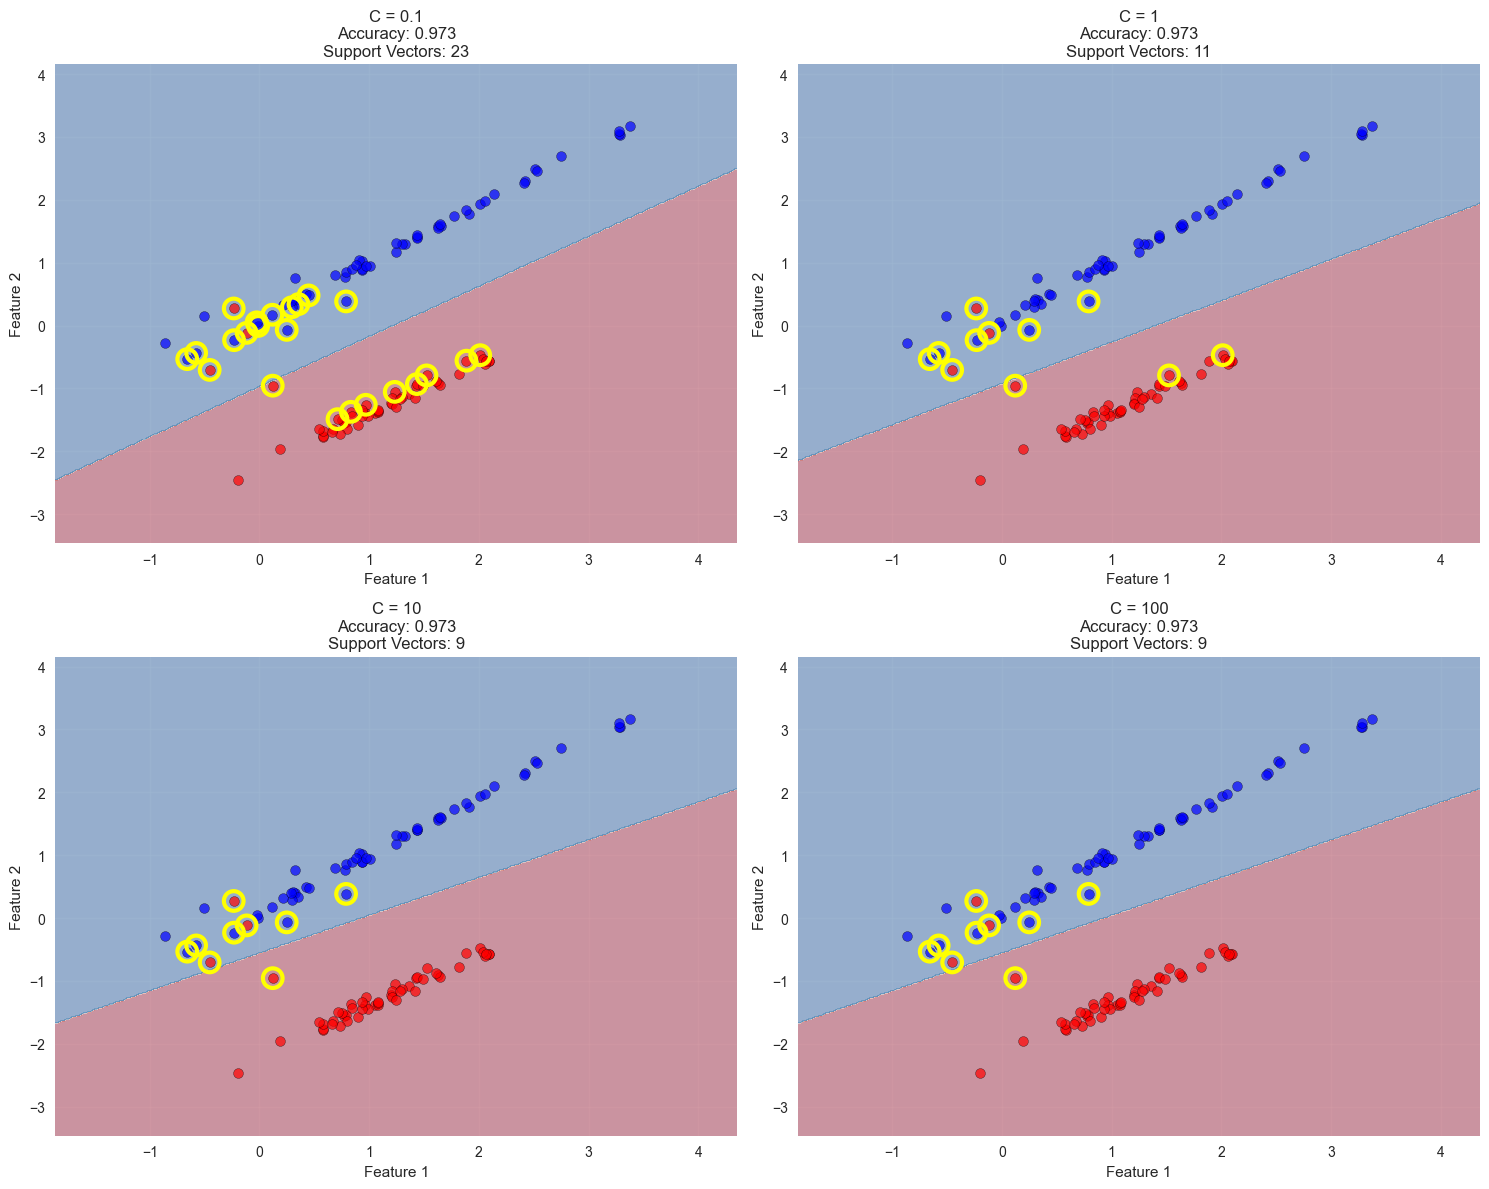

Key Insights:
• Low C (0.1): Soft margin, allows misclassification, fewer support vectors
• High C (100): Hard margin, tries to classify all correctly, more support vectors
• C controls bias-variance tradeoff


In [5]:
# Create a dataset with some noise to demonstrate C parameter effect
X_noise, y_noise = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                                      n_informative=2, n_clusters_per_class=1, 
                                      class_sep=1.2, random_state=42)

# Add some noise points
noise_points = np.random.randn(10, 2) * 0.5
X_noise = np.vstack([X_noise, noise_points])
y_noise = np.hstack([y_noise, np.random.randint(0, 2, 10)])

# Test different C values
C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, C in enumerate(C_values):
    ax = axes[idx]
    
    # Train SVM with different C values
    svm_c = SVC(kernel='linear', C=C, random_state=42)
    svm_c.fit(X_noise, y_noise)
    
    # Create mesh for plotting
    h = 0.02
    x_min, x_max = X_noise[:, 0].min() - 1, X_noise[:, 0].max() + 1
    y_min, y_max = X_noise[:, 1].min() - 1, X_noise[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = svm_c.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
    
    colors = ['red', 'blue']
    for i in range(2):
        mask = y_noise == i
        ax.scatter(X_noise[mask, 0], X_noise[mask, 1], c=colors[i], 
                  s=50, alpha=0.7, edgecolors='black')
    
    # Highlight support vectors
    support_vectors = svm_c.support_vectors_
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], 
              s=200, facecolors='none', edgecolors='yellow', linewidth=3)
    
    accuracy = svm_c.score(X_noise, y_noise)
    ax.set_title(f'C = {C}\nAccuracy: {accuracy:.3f}\nSupport Vectors: {len(support_vectors)}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insights:")
print("• Low C (0.1): Soft margin, allows misclassification, fewer support vectors")
print("• High C (100): Hard margin, tries to classify all correctly, more support vectors")
print("• C controls bias-variance tradeoff")

## 4. Non-Linear Data and Kernel Functions

Real-world data is often not linearly separable. SVMs use kernel functions to handle non-linear patterns.

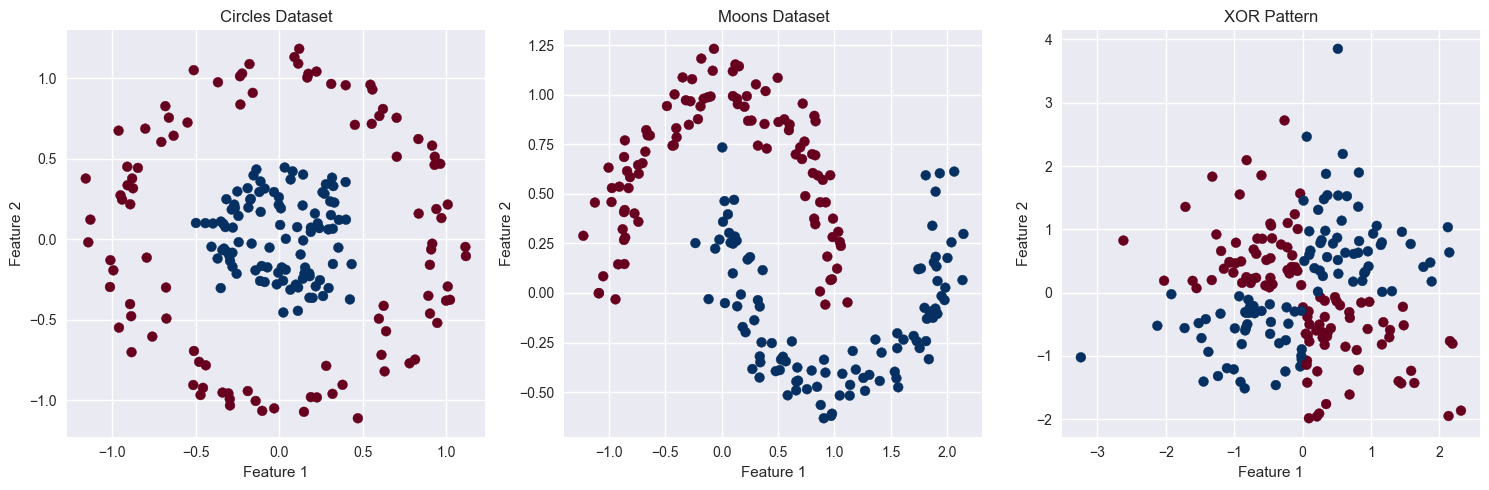

These datasets cannot be separated by a straight line!
We need non-linear decision boundaries.


In [6]:
# Create different non-linear datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Dataset 1: Circles
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)
axes[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='RdBu', s=50)
axes[0].set_title('Circles Dataset')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Dataset 2: Moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)
axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='RdBu', s=50)
axes[1].set_title('Moons Dataset')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Dataset 3: XOR-like pattern
np.random.seed(42)
X_xor = np.random.randn(200, 2)
y_xor = ((X_xor[:, 0] > 0) & (X_xor[:, 1] > 0)) | ((X_xor[:, 0] < 0) & (X_xor[:, 1] < 0))
y_xor = y_xor.astype(int)

axes[2].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='RdBu', s=50)
axes[2].set_title('XOR Pattern')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("These datasets cannot be separated by a straight line!")
print("We need non-linear decision boundaries.")

## 5. Kernel Functions Comparison

Let's compare different kernel functions on the circles dataset.

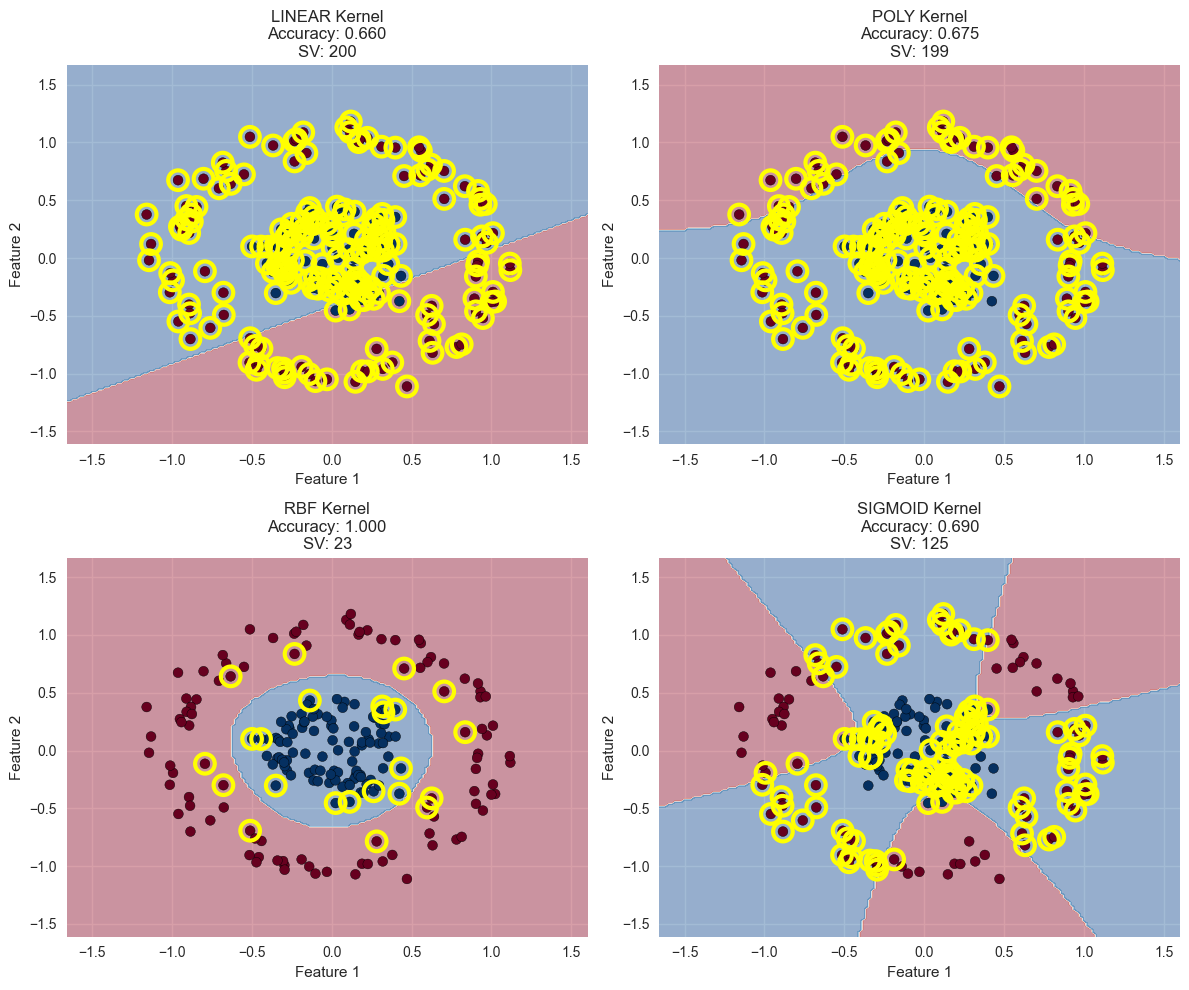

Kernel Performance on Circles Dataset:
• Linear: Poor - cannot handle circular boundary
• Polynomial: Good - can create curved boundaries
• RBF (Radial Basis Function): Excellent - handles circular patterns well
• Sigmoid: Variable - depends on parameters


In [7]:
# Compare different kernels on circles dataset
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, kernel in enumerate(kernels):
    ax = axes[idx]
    
    # Train SVM with different kernels
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        svm = SVC(kernel=kernel, random_state=42)
    
    svm.fit(X_circles, y_circles)
    
    # Create mesh for plotting
    h = 0.02
    x_min, x_max = X_circles[:, 0].min() - 0.5, X_circles[:, 0].max() + 0.5
    y_min, y_max = X_circles[:, 1].min() - 0.5, X_circles[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, 
              cmap='RdBu', s=50, edgecolors='black')
    
    # Highlight support vectors
    support_vectors = svm.support_vectors_
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], 
              s=200, facecolors='none', edgecolors='yellow', linewidth=3)
    
    accuracy = svm.score(X_circles, y_circles)
    ax.set_title(f'{kernel.upper()} Kernel\nAccuracy: {accuracy:.3f}\nSV: {len(support_vectors)}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("Kernel Performance on Circles Dataset:")
print("• Linear: Poor - cannot handle circular boundary")
print("• Polynomial: Good - can create curved boundaries")
print("• RBF (Radial Basis Function): Excellent - handles circular patterns well")
print("• Sigmoid: Variable - depends on parameters")

## 6. RBF Kernel Deep Dive

The RBF (Radial Basis Function) kernel is most commonly used. Let's explore the effect of its gamma parameter.

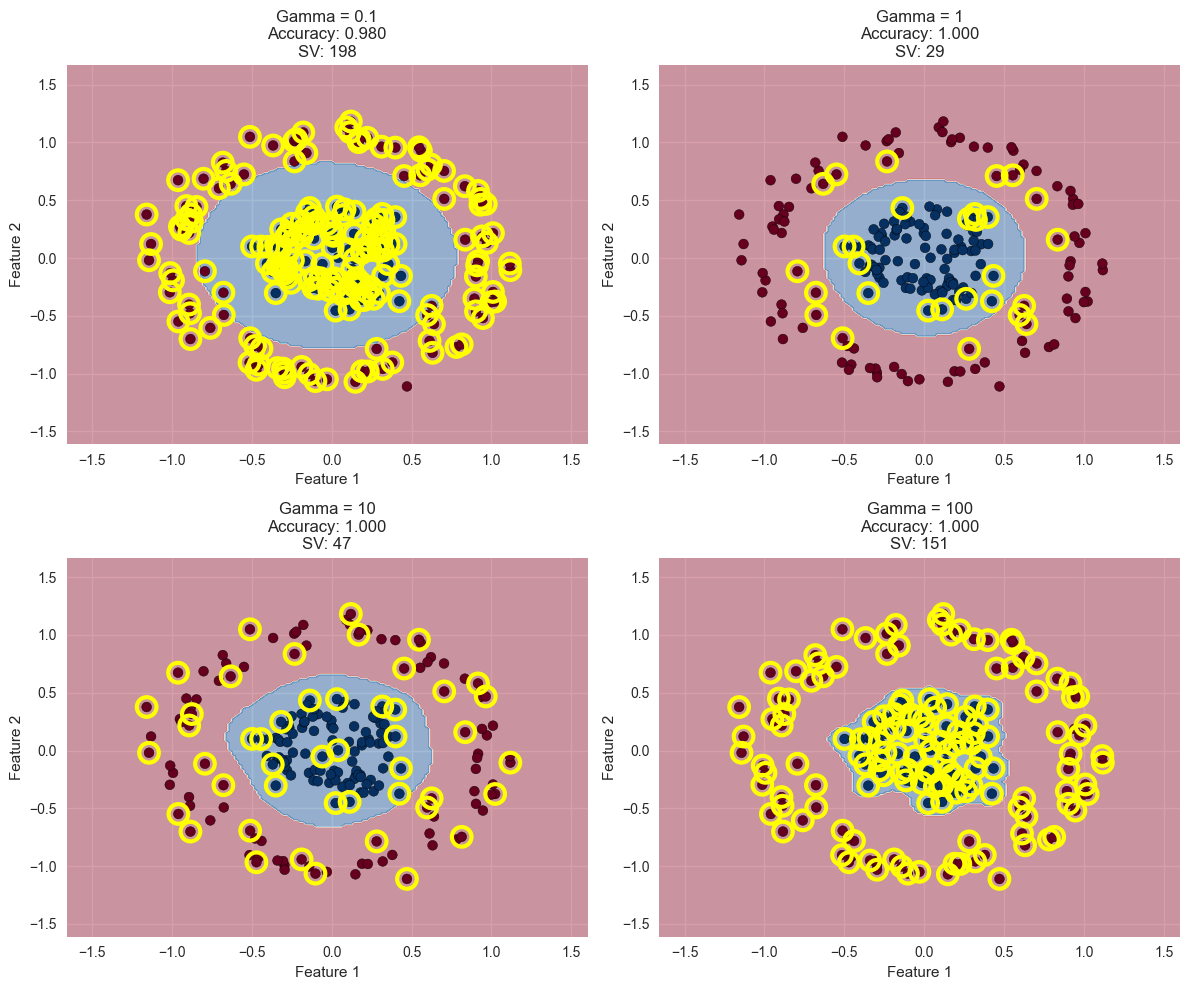

Gamma Parameter Effects:
• Low gamma (0.1): Smooth decision boundary, underfitting
• High gamma (100): Complex decision boundary, overfitting
• Gamma controls the 'reach' of each training example
• Higher gamma = more influence from nearby points


In [8]:
# Effect of gamma parameter in RBF kernel
gamma_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, gamma in enumerate(gamma_values):
    ax = axes[idx]
    
    # Train SVM with different gamma values
    svm_gamma = SVC(kernel='rbf', gamma=gamma, random_state=42)
    svm_gamma.fit(X_circles, y_circles)
    
    # Create mesh for plotting
    h = 0.02
    x_min, x_max = X_circles[:, 0].min() - 0.5, X_circles[:, 0].max() + 0.5
    y_min, y_max = X_circles[:, 1].min() - 0.5, X_circles[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = svm_gamma.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, 
              cmap='RdBu', s=50, edgecolors='black')
    
    # Highlight support vectors
    support_vectors = svm_gamma.support_vectors_
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], 
              s=200, facecolors='none', edgecolors='yellow', linewidth=3)
    
    accuracy = svm_gamma.score(X_circles, y_circles)
    ax.set_title(f'Gamma = {gamma}\nAccuracy: {accuracy:.3f}\nSV: {len(support_vectors)}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("Gamma Parameter Effects:")
print("• Low gamma (0.1): Smooth decision boundary, underfitting")
print("• High gamma (100): Complex decision boundary, overfitting")
print("• Gamma controls the 'reach' of each training example")
print("• Higher gamma = more influence from nearby points")

## 7. Real-World Application: Iris Dataset

Let's apply SVM to the classic Iris dataset for multi-class classification.

Iris Dataset Overview:
Shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Class distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


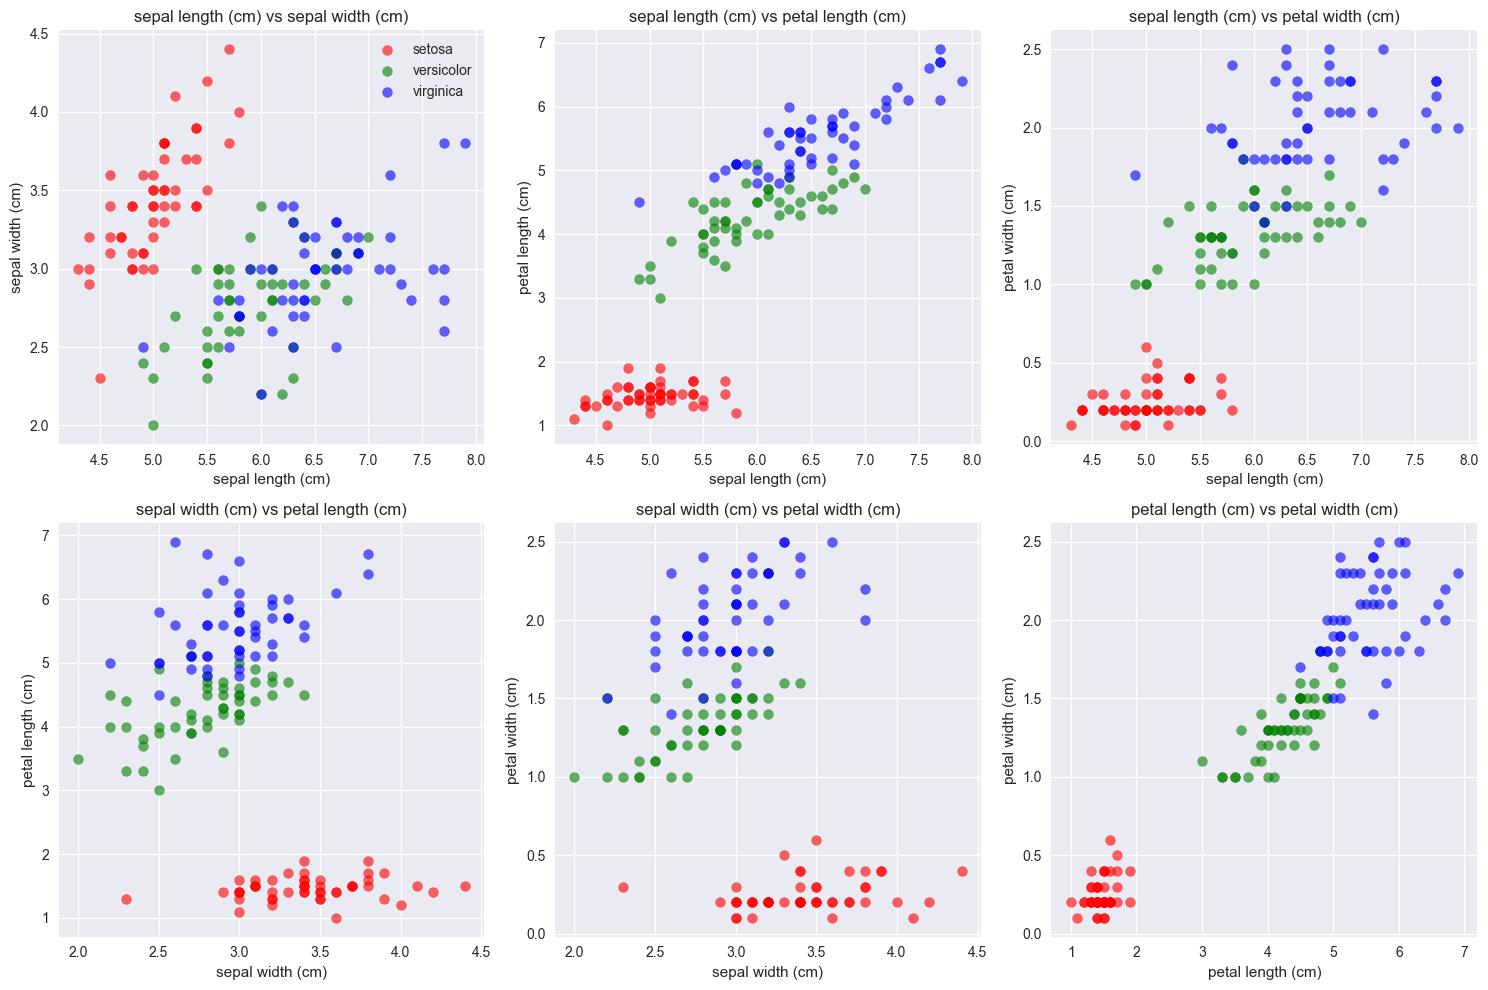

In [9]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Create DataFrame for exploration
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
iris_df['species'] = y_iris
iris_df['species_name'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})

print("Iris Dataset Overview:")
print(f"Shape: {X_iris.shape}")
print(f"Classes: {iris.target_names}")
print(f"Features: {iris.feature_names}")
print("\nClass distribution:")
print(iris_df['species_name'].value_counts())

# Visualize pairwise relationships
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
axes = axes.ravel()

for idx, (i, j) in enumerate(feature_pairs):
    ax = axes[idx]
    colors = ['red', 'green', 'blue']
    
    for class_idx in range(3):
        mask = y_iris == class_idx
        ax.scatter(X_iris[mask, i], X_iris[mask, j], 
                  c=colors[class_idx], label=iris.target_names[class_idx],
                  alpha=0.6, s=50)
    
    ax.set_xlabel(iris.feature_names[i])
    ax.set_ylabel(iris.feature_names[j])
    ax.set_title(f'{iris.feature_names[i]} vs {iris.feature_names[j]}')
    if idx == 0:
        ax.legend()

plt.tight_layout()
plt.show()

Importance of Feature Scaling:
SVM without scaling: 0.956
SVM with scaling: 0.933
Improvement: -0.022


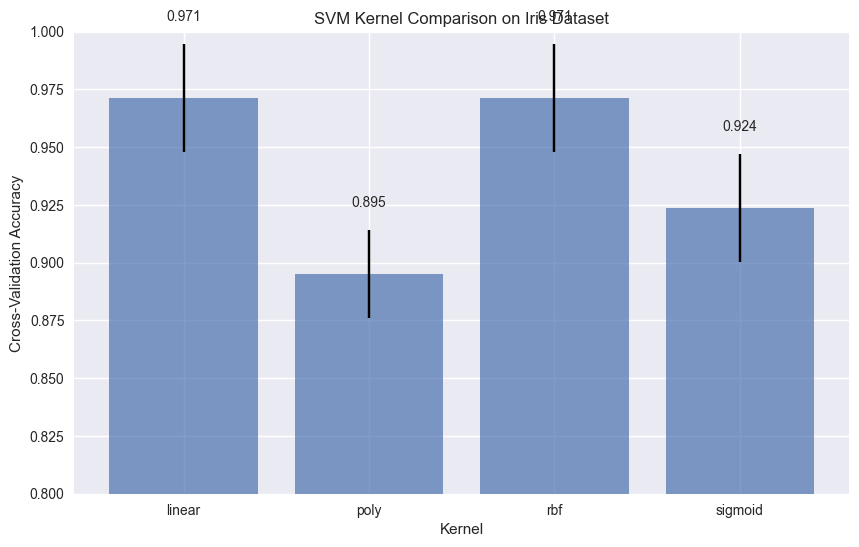


Kernel Performance (Cross-Validation):
linear: 0.971 (+/- 0.023)
poly: 0.895 (+/- 0.019)
rbf: 0.971 (+/- 0.023)
sigmoid: 0.924 (+/- 0.023)


In [10]:
# Split data and scale features
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, 
                                                    random_state=42, stratify=y_iris)

# Feature scaling is important for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compare SVM performance with and without scaling
svm_no_scale = SVC(kernel='rbf', random_state=42)
svm_scaled = SVC(kernel='rbf', random_state=42)

# Train without scaling
svm_no_scale.fit(X_train, y_train)
acc_no_scale = svm_no_scale.score(X_test, y_test)

# Train with scaling
svm_scaled.fit(X_train_scaled, y_train)
acc_scaled = svm_scaled.score(X_test_scaled, y_test)

print("Importance of Feature Scaling:")
print(f"SVM without scaling: {acc_no_scale:.3f}")
print(f"SVM with scaling: {acc_scaled:.3f}")
print(f"Improvement: {acc_scaled - acc_no_scale:.3f}")

# Compare different kernels on scaled data
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = {}

for kernel in kernels:
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        svm = SVC(kernel=kernel, random_state=42)
    
    # Cross-validation
    cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)
    kernel_results[kernel] = {
        'mean_cv': cv_scores.mean(),
        'std_cv': cv_scores.std()
    }

# Plot kernel comparison
plt.figure(figsize=(10, 6))
kernels_list = list(kernel_results.keys())
means = [kernel_results[k]['mean_cv'] for k in kernels_list]
stds = [kernel_results[k]['std_cv'] for k in kernels_list]

plt.bar(kernels_list, means, yerr=stds, capsize=5, alpha=0.7)
plt.xlabel('Kernel')
plt.ylabel('Cross-Validation Accuracy')
plt.title('SVM Kernel Comparison on Iris Dataset')
plt.ylim(0.8, 1.0)

# Add value labels
for i, (kernel, mean, std) in enumerate(zip(kernels_list, means, stds)):
    plt.text(i, mean + std + 0.01, f'{mean:.3f}', ha='center')

plt.show()

print("\nKernel Performance (Cross-Validation):")
for kernel, results in kernel_results.items():
    print(f"{kernel}: {results['mean_cv']:.3f} (+/- {results['std_cv']:.3f})")

## 8. Hyperparameter Tuning

Let's find the optimal hyperparameters using Grid Search.

In [11]:
# Define parameter grids for different kernels
param_grids = {
    'rbf': {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    },
    'poly': {
        'kernel': ['poly'],
        'C': [0.1, 1, 10, 100],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto']
    },
    'linear': {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    }
}

# Perform grid search for each kernel
best_models = {}
for kernel_name, param_grid in param_grids.items():
    print(f"\nTuning {kernel_name} kernel...")
    
    grid_search = GridSearchCV(SVC(random_state=42), param_grid, 
                              cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[kernel_name] = {
        'model': grid_search.best_estimator_,
        'params': grid_search.best_params_,
        'score': grid_search.best_score_
    }
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.3f}")

# Compare best models
print("\n" + "="*50)
print("FINAL MODEL COMPARISON")
print("="*50)

test_results = {}
for kernel_name, model_info in best_models.items():
    model = model_info['model']
    test_score = model.score(X_test_scaled, y_test)
    test_results[kernel_name] = test_score
    
    print(f"{kernel_name.upper()} Kernel:")
    print(f"  CV Score: {model_info['score']:.3f}")
    print(f"  Test Score: {test_score:.3f}")
    print(f"  Parameters: {model_info['params']}")
    print()

# Find best performing model
best_kernel = max(test_results, key=test_results.get)
best_model = best_models[best_kernel]['model']

print(f"Best performing kernel: {best_kernel.upper()}")
print(f"Best test accuracy: {test_results[best_kernel]:.3f}")


Tuning rbf kernel...
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV score: 0.981

Tuning poly kernel...
Best parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best CV score: 0.971

Tuning linear kernel...
Best parameters: {'C': 100, 'kernel': 'linear'}
Best CV score: 0.981

FINAL MODEL COMPARISON
RBF Kernel:
  CV Score: 0.981
  Test Score: 0.911
  Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

POLY Kernel:
  CV Score: 0.971
  Test Score: 0.911
  Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

LINEAR Kernel:
  CV Score: 0.981
  Test Score: 0.933
  Parameters: {'C': 100, 'kernel': 'linear'}

Best performing kernel: LINEAR
Best test accuracy: 0.933


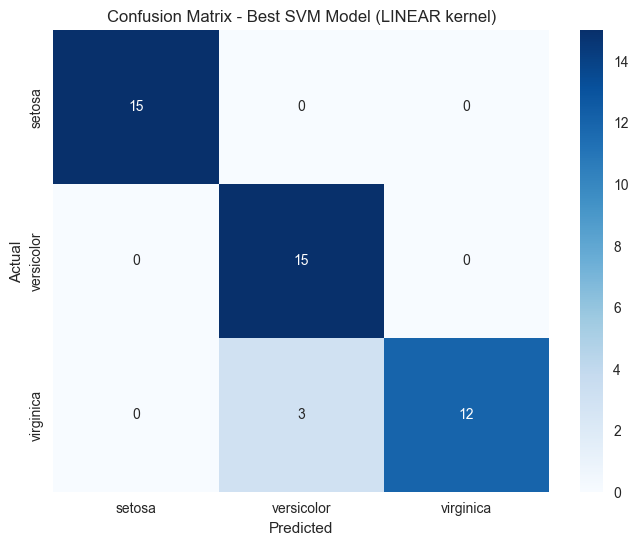


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Support Vectors Analysis:
Total support vectors: 9
Support vectors per class: [2 3 4]
Percentage of training data as support vectors: 8.6%


In [12]:
# Detailed evaluation of best model
y_pred = best_model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best SVM Model ({best_kernel.upper()} kernel)')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Support vectors analysis
print(f"\nSupport Vectors Analysis:")
print(f"Total support vectors: {len(best_model.support_vectors_)}")
print(f"Support vectors per class: {best_model.n_support_}")
print(f"Percentage of training data as support vectors: {len(best_model.support_vectors_)/len(X_train_scaled)*100:.1f}%")

## 9. SVM for Regression (SVR)

SVMs can also be used for regression tasks. Let's explore Support Vector Regression.

In [ ]:
# Create regression dataset
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Compare different SVR kernels
svr_models = {
    'Linear': SVR(kernel='linear', C=1.0),
    'RBF': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'Polynomial': SVR(kernel='poly', C=1.0, degree=3, gamma='scale')
}

# Create prediction grid
X_plot = np.linspace(0, 5, 300).reshape(-1, 1)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, model) in enumerate(svr_models.items()):
    ax = axes[idx]
    
    # Train model
    model.fit(X_train_reg, y_train_reg)
    
    # Make predictions
    y_pred_plot = model.predict(X_plot)
    y_pred_test = model.predict(X_test_reg)
    
    # Calculate MSE
    mse = np.mean((y_test_reg - y_pred_test) ** 2)
    
    # Plot
    ax.scatter(X_train_reg, y_train_reg, color='blue', alpha=0.5, label='Training data')
    ax.scatter(X_test_reg, y_test_reg, color='red', alpha=0.5, label='Test data')
    ax.plot(X_plot, y_pred_plot, color='green', linewidth=2, label='SVR prediction')
    ax.plot(X_plot, np.sin(X_plot), color='black', linestyle='--', alpha=0.7, label='True function')
    
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title(f'{name} SVR\nMSE: {mse:.3f}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

print("SVR Performance:")
for name, model in svr_models.items():
    y_pred = model.predict(X_test_reg)
    mse = np.mean((y_test_reg - y_pred) ** 2)
    print(f"{name}: MSE = {mse:.3f}")

## 10. High-Dimensional Data: Text Classification

SVMs excel with high-dimensional data. Let's create a simple text classification example.

In [ ]:
# Simple text classification example
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Sample text data
texts = [
    # Sports (class 0)
    "football game victory team player score goal",
    "basketball match win lose points shooting",
    "soccer world cup tournament championship",
    "tennis match serve volley racket court",
    "baseball home run pitcher batter stadium",
    "hockey puck goal ice rink skating",
    "swimming pool water stroke competition",
    "running marathon race finish line speed",
    
    # Technology (class 1)
    "computer software programming code algorithm",
    "machine learning artificial intelligence neural network",
    "smartphone mobile app development android ios",
    "internet web browser search engine google",
    "database sql query data storage cloud",
    "cybersecurity encryption password protection firewall",
    "virtual reality vr headset gaming experience",
    "blockchain cryptocurrency bitcoin ethereum mining",
    
    # Medicine (class 2)
    "doctor patient hospital treatment medicine",
    "surgery operation surgeon medical procedure",
    "pharmacy drug prescription medication dosage",
    "diagnosis symptoms disease infection cure",
    "vaccine immunization prevention health care",
    "emergency ambulance first aid rescue",
    "nursing patient care medical assistance",
    "laboratory test blood sample analysis"
]

# Labels
labels = [0]*8 + [1]*8 + [2]*8  # 0: Sports, 1: Technology, 2: Medicine
class_names = ['Sports', 'Technology', 'Medicine']

# Split data
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    texts, labels, test_size=0.3, random_state=42, stratify=labels
)

# Create pipeline with TF-IDF and SVM
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100, stop_words='english')),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
])

# Train model
text_pipeline.fit(X_train_text, y_train_text)

# Make predictions
y_pred_text = text_pipeline.predict(X_test_text)

# Evaluate
accuracy = accuracy_score(y_test_text, y_pred_text)
print(f"Text Classification Accuracy: {accuracy:.3f}")

# Test on new examples
new_texts = [
    "The quarterback threw a perfect pass for touchdown",
    "Python is a great programming language for data science",
    "The patient needs urgent medical attention from doctor"
]

predictions = text_pipeline.predict(new_texts)
probabilities = text_pipeline.predict_proba(new_texts)

print("\nPredictions on new texts:")
for i, text in enumerate(new_texts):
    pred_class = class_names[predictions[i]]
    confidence = probabilities[i][predictions[i]]
    print(f"Text: '{text}'")
    print(f"Prediction: {pred_class} (confidence: {confidence:.3f})\n")

# Show feature importance (top words)
feature_names = text_pipeline.named_steps['tfidf'].get_feature_names_out()
coef = text_pipeline.named_steps['svm'].coef_[0]  # For binary classification

# print("Most important features (words):")
# top_indices = np.argsort(np.abs(coef))[-10:]
# for idx in reversed(top_indices):
#     print(f"{feature_names[idx]}: {float(coef[idx]):.3f}")

Text Classification Accuracy: 0.250

Predictions on new texts:
Text: 'The quarterback threw a perfect pass for touchdown'
Prediction: Sports (confidence: 0.423)

Text: 'Python is a great programming language for data science'
Prediction: Technology (confidence: 0.035)

Text: 'The patient needs urgent medical attention from doctor'
Prediction: Medicine (confidence: 0.024)

Most important features (words):


TypeError: float() argument must be a string or a real number, not 'csr_matrix'

## 11. Breast Cancer Detection - Medical Application

Let's apply SVM to a real medical dataset for cancer detection.

In [ ]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Split and scale data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

# Grid search for best parameters
param_grid_cancer = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

svm_cancer = SVC(random_state=42)
grid_search_cancer = GridSearchCV(svm_cancer, param_grid_cancer, 
                                 cv=5, scoring='accuracy', n_jobs=-1)
grid_search_cancer.fit(X_train_cancer_scaled, y_train_cancer)

print("Breast Cancer Detection Results:")
print(f"Best parameters: {grid_search_cancer.best_params_}")
print(f"Best CV score: {grid_search_cancer.best_score_:.3f}")

# Test set evaluation
best_svm_cancer = grid_search_cancer.best_estimator_
y_pred_cancer = best_svm_cancer.predict(X_test_cancer_scaled)
test_accuracy = accuracy_score(y_test_cancer, y_pred_cancer)

print(f"Test accuracy: {test_accuracy:.3f}")

# Detailed evaluation
cm_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Breast Cancer Detection - SVM\nAccuracy: {test_accuracy:.3f}')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_cancer, y_pred_cancer, 
                          target_names=['Malignant', 'Benign']))

# Support vectors analysis
print(f"\nSupport Vectors:")
print(f"Total: {len(best_svm_cancer.support_vectors_)}")
print(f"Per class: {best_svm_cancer.n_support_}")
print(f"Percentage of training data: {len(best_svm_cancer.support_vectors_)/len(X_train_cancer_scaled)*100:.1f}%")

## 12. SVM Advantages and Limitations

Let's summarize when to use SVMs and their trade-offs.

In [ ]:
# Performance comparison with other algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# Use breast cancer dataset for comparison
algorithms = {
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

results = {}
for name, model in algorithms.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train_cancer_scaled, y_train_cancer)
    training_time = time.time() - start_time
    
    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_cancer_scaled)
    prediction_time = time.time() - start_time
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_cancer, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'training_time': training_time,
        'prediction_time': prediction_time
    }

# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy comparison
names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in names]
training_times = [results[name]['training_time'] for name in names]
prediction_times = [results[name]['prediction_time'] for name in names]

axes[0].bar(names, accuracies)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0.9, 1.0)

axes[1].bar(names, training_times)
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_title('Training Time Comparison')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(names, prediction_times)
axes[2].set_ylabel('Prediction Time (seconds)')
axes[2].set_title('Prediction Time Comparison')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Algorithm Performance Summary:")
print("-" * 60)
for name, result in results.items():
    print(f"{name:20s}: Accuracy={result['accuracy']:.3f}, "
          f"Train={result['training_time']:.3f}s, "
          f"Predict={result['prediction_time']:.4f}s")

## Summary and Best Practices

### SVM Advantages:
1. **Effective in high dimensions**: Works well when # features > # samples
2. **Memory efficient**: Uses subset of training points (support vectors)
3. **Versatile**: Different kernel functions for different data types
4. **Robust**: Less prone to overfitting in high-dimensional spaces

### SVM Disadvantages:
1. **Slow on large datasets**: O(n²) to O(n³) time complexity
2. **Feature scaling required**: Sensitive to feature scales
3. **No probabilistic output**: Need to use additional techniques for probabilities
4. **Parameter sensitive**: Requires careful tuning of C and gamma

### When to use SVM:
- **High-dimensional data** (text, images, genomics)
- **Clear margin of separation** exists
- **Small to medium datasets** (< 10,000 samples)
- **Non-linear patterns** (with appropriate kernels)

### Best Practices:
1. **Always scale features** using StandardScaler
2. **Start with RBF kernel** for non-linear data
3. **Use Grid Search** to find optimal C and gamma
4. **Consider linear kernel** for high-dimensional sparse data
5. **Cross-validate** to avoid overfitting
6. **Monitor support vector count** - too many indicates overfitting

### Parameter Guidelines:
- **C parameter**: Start with 1, increase if underfitting, decrease if overfitting
- **Gamma (RBF)**: Start with 'scale', try 0.001, 0.01, 0.1, 1
- **Kernel choice**: Linear for text/sparse data, RBF for dense data

SVM is a powerful algorithm that shines in high-dimensional spaces and with the right parameter tuning!